In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("outbreaks.csv")

In [69]:
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19119 non-null  int64  
 1   Month              19119 non-null  object 
 2   State              19119 non-null  object 
 3   Location           16953 non-null  object 
 4   Food               10156 non-null  object 
 5   Ingredient         1876 non-null   object 
 6   Species            12500 non-null  object 
 7   Serotype/Genotype  3907 non-null   object 
 8   Status             12500 non-null  object 
 9   Illnesses          19119 non-null  int64  
 10  Hospitalizations   15494 non-null  float64
 11  Fatalities         15518 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [71]:
data.isna().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

In [72]:
# Irrelevant Columns Drop

In [73]:
data = data.drop(["Month", "Ingredient", "Food", "Serotype/Genotype", "Status"],axis=1)

In [74]:
data.head()

,Year,State,Location,Species,Illnesses,Hospitalizations,Fatalities
0,1998,California,Restaurant,NaN,20,0.0,0.0
1,1998,California,NaN,NaN,112,0.0,0.0
2,1998,California,Restaurant,NaN,35,0.0,0.0
3,1998,California,Restaurant,Scombroid toxin,4,0.0,0.0
4,1998,California,Private Home/Residence,Salmonella enterica,26,3.0,0.0


In [75]:
# Q.1 Outbreak Trend

In [76]:
X = data["Year"]
y = data["Illnesses"]

In [77]:
X = data["Year"].values.reshape(-1, 1)


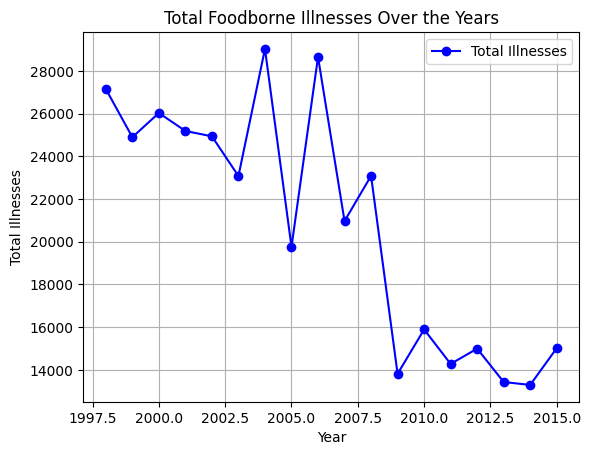

In [78]:

yearly_data = data.groupby("Year")["Illnesses"].sum()

plt.plot(yearly_data.index, yearly_data.values, marker='o', color='blue', label='Total Illnesses')
plt.title("Total Foodborne Illnesses Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Illnesses")
plt.grid(True)
plt.legend()
plt.show()


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,r2_score

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test,y_pred))

# Not Worth Linear Regression

0.00015839206648571302


In [79]:
# Q.2 Contaminant Responsible

In [80]:
data['Hospitalizations'] = data['Hospitalizations'].fillna(0)
data['Fatalities'] = data['Fatalities'].fillna(0)
data['Location'] = data['Location'].fillna("Unspecified")
data['Species'] = data['Species'].fillna("Unspecified")


In [81]:
data.isna().sum()

Year                0
State               0
Location            0
Species             0
Illnesses           0
Hospitalizations    0
Fatalities          0
dtype: int64

In [82]:
contaminant_stats = (data.groupby('Species', dropna=True)[['Illnesses', 'Hospitalizations', 'Fatalities']].sum().sort_values(by='Illnesses', ascending=False))

most_illnesses = contaminant_stats['Illnesses'].idxmax()
most_hospitalizations = contaminant_stats['Hospitalizations'].idxmax()
most_fatalities = contaminant_stats['Fatalities'].idxmax()

contaminant_stats.head(), most_illnesses, most_hospitalizations, most_fatalities

(                         Illnesses  Hospitalizations  Fatalities
 Species                                                         
 Unspecified                  77835             958.0        26.0
 Norovirus genogroup I        76406             668.0         2.0
 Salmonella enterica          60018            6888.0        82.0
 Norovirus genogroup II       38175             518.0         6.0
 Clostridium perfringens      28734             106.0        12.0,
 'Unspecified',
 'Salmonella enterica',
 'Listeria monocytogenes')

In [83]:
# Q.3 Highest Risk Location

In [84]:

location_stats = (data.groupby('Location', dropna=True)['Illnesses'].sum().sort_values(ascending=False))

highest_risk_location = location_stats.idxmax()

highest_risk_location

'Restaurant'